# ***Seoul Bike Sharing Demand***
 ## regression problem
 #### Shokoufeh Naseri 466750
 #### Zaid Alotel

## ***Data sets description and problem analyzed***

In many urban cities, rental bikes have become an essential part of enhancing mobility and convenience. Ensuring that rental bikes are available and accessible at the right time is critical to minimizing wait times and meeting demand efficiently. This requires accurate prediction of the hourly demand for rental bikes to maintain a stable supply and provide a seamless experience for users. Addressing this challenge is vital for optimizing the allocation and distribution of bikes throughout the city.

**Problem Analyzed**

The goal of this project is to predict the number of bikes rented per hour using various machine learning techniques. This involves identifying relationships between weather, time, and other variables with bike rental counts and assessing the performance of different models.


**Data Understandin**

The dataset includes:

Target Variable: Number of bikes rented per hour.

Features:

Weather Data: Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar Radiation, Snowfall, Rainfall.

Date-Time Data: Hour, Day, Month, Year, Weekday, Holiday/Working day.

Added data: feat01, feat02, feat03, feat04, feat05, feat06, feat07, feat08,feat10

Size: Approximately 11,680 rows and 24 columns.


In [121]:
import pandas as pd
# Define the data
data = {
    "Parameters/Features": [
        "Date", "Dew point temperature", "feature 01-10",  "Functioning Day",
        "Holiday", "Hour", "Humidity",  "Rented Bike count", "Seasons", 
        "Solar Radiation", "Temperature", "Visibility", "Wind speed","Rainfall", "Snowfall"
    ],
    "Abbreviation": [
        "Date", "Dew point temperature", "feat01-10", "Functioning Day", "Holiday", "Hour", "Humidity",
         "Rented Bike Count", "Seasons",  "Solar radiation", "Temperature",
        "Visibility", "Wind speed","Rainfall", "Snowfall"
    ],
    "Type": [
        "datetime64[ns]", "Continuous", "Continuous",  "Categorical", "Categorical",
        "Continuous", "Continuous",  "Continuous", "Categorical", 
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous"
    ],
    "Measurement": [
        "1=2018, 0=2017", "°C", "", "0=NoFunc, 1=Func", "1=Holiday, 0=No holiday",
        "0, 1, 2, ..., 23", "%",  "0, 1, 2, ..., 3556", "3=Autumn, 1=Spring, 2=Summer, 4=Winter",
         "MJ/m²", "°C", "10 m", "m/s", "Mm", "cm"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Style the table
styled_df = df.style.set_table_styles(
    [
        {"selector": "thead th", "props": [("background-color", "#48AAAD"), ("color", "white"), ("font-weight", "bold")]},
        {"selector": "tbody td", "props": [("text-align", "center")]},
        {"selector": "table", "props": [("border", "1px solid black"), ("border-collapse", "collapse"), ("width", "100%")]}
    ]
).set_properties(**{"border": "1px solid black", "padding": "5px"})

styled_df


,Parameters/Features,Abbreviation,Type,Measurement
0,Date,Date,datetime64[ns],"1=2018, 0=2017"
1,Dew point temperature,Dew point temperature,Continuous,°C
2,feature 01-10,feat01-10,Continuous,
3,Functioning Day,Functioning Day,Categorical,"0=NoFunc, 1=Func"
4,Holiday,Holiday,Categorical,"1=Holiday, 0=No holiday"
5,Hour,Hour,Continuous,"0, 1, 2, ..., 23"
6,Humidity,Humidity,Continuous,%
7,Rented Bike count,Rented Bike Count,Continuous,"0, 1, 2, ..., 3556"
8,Seasons,Seasons,Categorical,"3=Autumn, 1=Spring, 2=Summer, 4=Winter"
9,Solar Radiation,Solar radiation,Continuous,MJ/m²


This table provides a structured overview of the dataset's features, including their abbreviations, data types, and measurement units or value ranges. Here's what each column represents:

**Features**: The names of the features in the dataset.

**Abbreviation**: A shortened or standardized form of the feature names.

**Type**: Indicates whether the data is categorical, continuous, or datetime.

**Measurement**: Describes the units of measurement or specific coding for categorical features.

*** Loading Required Packages***

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


***Brief Explanation of the Libraries:***

**1. Pandas:** For data manipulation and analysis, particularly working with DataFrames.

**2. Seaborn & Matplotlib:** For data visualization, used to create plots and charts.

**3. Scikit-learn:** A comprehensive library for machine learning that provides tools for data preprocessing, modeling, evaluation, and more. You’re using it for:

  **. Preprocessing:** MinMaxScaler for feature scaling.

  **. Models:** RandomForestRegressor, DecisionTreeRegressor, BaggingRegressor, GradientBoostingRegressor for regression tasks.

  **. Evaluation:** Metrics like mean_squared_error, r2_score, and mean_absolute_error to assess model performance.

  **. Model Selection:** train_test_split for splitting data, GridSearchCV for hyperparameter tuning.

**4. Boruta:** A feature selection method used to identify important features.

**5. TensorFlow (Keras):** For building and training neural network models (Sequential, Dense, and Adam optimizer).

**6. Numpy:** For numerical operations, especially with arrays.

This set of imports provides a solid foundation for data preprocessing, model training, evaluation, and optimization for machine learning tasks

## **Data Loading and Exploration**

In [23]:
Data = pd.read_csv('r4.csv')

In [124]:
Data.head()

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,...,Hour,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
0,1,08/11/2018,8.8,0.585382,0.026140,0.920350,0.315114,0.977342,0.169791,0.656922,...,8,89,0.0,148,Autumn,0.0,0.02,10.6,689,1.5
1,2,26/09/2018,8.9,0.730931,0.066437,0.349515,0.456733,0.822811,0.471541,0.424646,...,7,62,0.0,335,Autumn,0.0,0.01,16.3,2000,2.0
2,3,12/01/2018,-18.5,0.826907,0.325077,0.772166,0.918194,0.994359,0.239573,0.535647,...,22,39,0.0,186,Winter,0.0,0.00,-6.9,2000,1.6
3,4,26/07/2018,24.8,0.115778,0.793062,0.259372,0.797660,0.109027,0.657459,0.522908,...,21,74,0.0,1868,Summer,0.0,0.00,30.0,1056,2.7
4,5,26/05/2018,9.1,0.319288,0.842444,0.001954,0.976224,0.898576,0.036342,0.525282,...,13,31,0.0,1441,Spring,0.0,3.29,27.8,1326,2.0


In [125]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11680 entries, 0 to 11679
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11680 non-null  int64  
 1   Date                   11680 non-null  object 
 2   Dew point temperature  11680 non-null  float64
 3   feat01                 11680 non-null  float64
 4   feat02                 11680 non-null  float64
 5   feat03                 11680 non-null  float64
 6   feat04                 11680 non-null  float64
 7   feat05                 11680 non-null  float64
 8   feat06                 11680 non-null  float64
 9   feat07                 11680 non-null  float64
 10  feat08                 11680 non-null  float64
 11  feat10                 11680 non-null  float64
 12  Functioning Day        11680 non-null  object 
 13  Holiday                11680 non-null  object 
 14  Hour                   11680 non-null  int64  
 15  Hu



The dataset contains 11,680 entries and 24 columns. Here's a breakdown of the data:

- **Data Types**:
  - **int64**: Columns like `id`, `Hour`, `Humidity`, `Rented Bike Count`, `Visibility` have integer values.
  - **float64**: Several columns, including `Dew point temperature`, `Rainfall`, `Snowfall`, and others, contain floating-point values.
  - **object**: Categorical columns like `Date`, `Functioning Day`, `Holiday`, and `Seasons` contain string values.

- **Non-Null Counts**: All columns have 11,680 non-null entries, meaning there are no missing values in the dataset.



In [9]:
Data.describe()

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,...,Humidity,Rainfall,Rented Bike Count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,year,month
count,11680.000000,11680,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,...,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,5840.500000,2018-05-01 14:00:19.726027520,0.752046,0.501512,0.491890,0.495178,0.503874,0.501122,0.504344,0.506352,...,56.734589,0.121995,603.504795,0.102072,0.520689,9.724161,1419.188356,1.773476,2017.872603,6.034247
min,1.000000,2017-12-01 00:00:00,-30.600000,0.000060,0.000053,0.000041,0.000038,0.000313,0.000463,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,27.000000,0.000000,2017.000000,1.000000
25%,2920.750000,2018-01-30 00:00:00,-10.025000,0.247687,0.242200,0.245594,0.251301,0.253241,0.252874,0.424095,...,40.000000,0.000000,168.000000,0.000000,0.000000,0.100000,896.000000,1.000000,2018.000000,3.000000
50%,5840.500000,2018-04-01 00:00:00,0.700000,0.500108,0.484624,0.489729,0.503993,0.502959,0.512171,0.507535,...,55.000000,0.000000,365.000000,0.000000,0.000000,8.500000,1678.000000,1.600000,2018.000000,6.000000
75%,8760.250000,2018-08-01 00:00:00,11.525000,0.753892,0.740760,0.744242,0.756368,0.751092,0.752649,0.588661,...,73.000000,0.000000,904.250000,0.000000,0.820000,20.000000,1998.000000,2.400000,2018.000000,10.000000
max,11680.000000,2018-11-30 00:00:00,27.200000,0.999985,0.999982,0.999993,0.999998,0.999842,0.999929,1.000000,...,98.000000,35.000000,3556.000000,8.800000,3.520000,39.400000,2000.000000,7.400000,2018.000000,12.000000
std,3371.869907,NaN,13.496679,0.289155,0.289140,0.288472,0.289598,0.289319,0.289384,0.124456,...,20.432232,1.014351,600.096799,0.488215,0.823745,12.246182,619.962048,1.061456,0.333432,3.808975


### **Summary Statistics**

The following provides a summary of the key statistics for each feature in the dataset:

- **count**: All columns have 11,680 non-null values, indicating no missing data.
- **mean**: The average value for each feature. For example, the average `Dew point temperature` is approximately 0.75, and the average `Rented Bike Count` is around 603.5.
- **std (Standard Deviation)**: A measure of how much each feature varies. For example, the `Dew point temperature` has a standard deviation of 13.5, indicating significant variation.
- **min**: The minimum value for each feature. For instance, the minimum `Dew point temperature` is -30.6, and the minimum `Rented Bike Count` is 0.
- **25%**: The value below which 25% of the data falls. For `Dew point temperature`, it's -10.03.
- **50% (Median)**: The middle value in the dataset, with half the values above and half below. For `Dew point temperature`, the median is 0.7.
- **75%**: The value below which 75% of the data falls. For `Dew point temperature`, it's 11.53.
- **max**: The maximum value for each feature. For example, the maximum `Dew point temperature` is 27.2, and the maximum `Rented Bike Count` is 3556.

This summary helps to quickly understand the distribution and range of values in each feature of the dataset.


In [24]:
#changing the type of Date to the date format datetime64[ns]
Data['Date'] = pd.to_datetime(Data['Date'], format='%d/%m/%Y')
# from when untill when
print('Data collected from :', Data['Date'].min())
print('Data collected untill :', Data['Date'].max())
#extract the year
#Data['year'] = Data['Date'].dt.year
Data['month'] = Data['Date'].dt.month

Data collected from : 2017-12-01 00:00:00
Data collected untill : 2018-11-30 00:00:00


Instead of completely removing the date column, we extract the month information, as the availability of bikes likely varies seasonally. By converting the date to its corresponding month, we retain meaningful temporal information that can improve the model's understanding of trends.

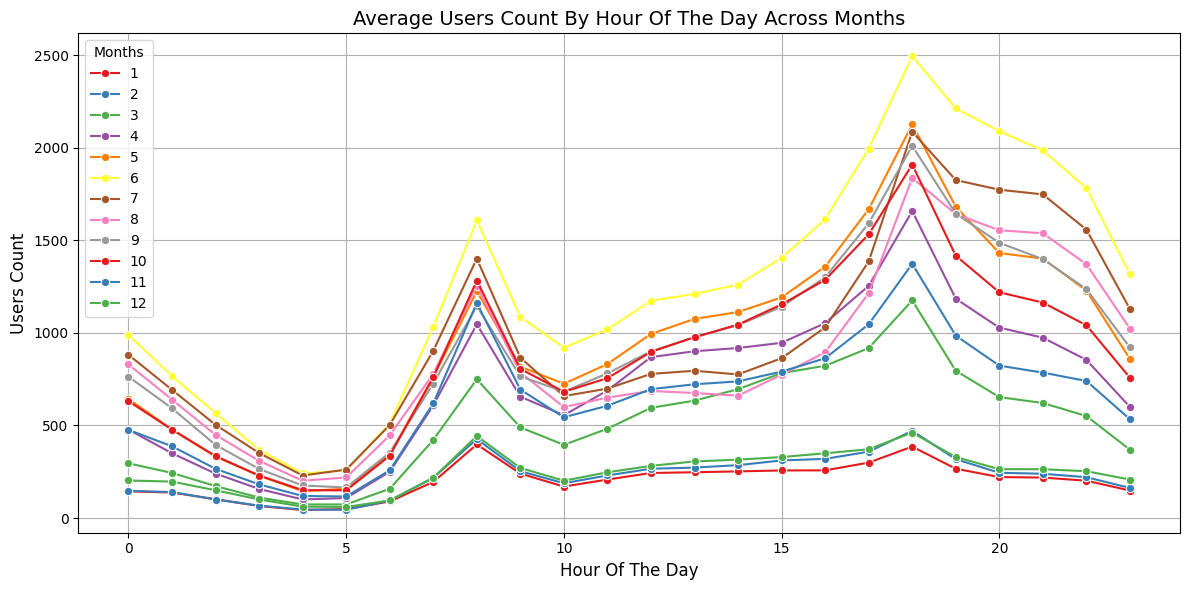

In [11]:


# Function to plot average users count by hour across months
def plot_average_users_by_hour_month(df, target, hour_col='Hour', month_col='month'):
    """
    Plot average user count by hour of the day across months.
    Parameters:
    - df: DataFrame containing the data.
    - target: Name of the target variable column (e.g., Rented Bike Count).
    - hour_col: Name of the hour column.
    - month_col: Name of the month column.
    """
    
    # Aggregate the data
    aggregated_data = df.groupby([hour_col, month_col])[target].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=aggregated_data,
        x=hour_col,
        y=target,
        hue=month_col,
        marker='o',
        palette='Set1'
    )

    # Customize the plot
    plt.title('Average Users Count By Hour Of The Day Across Months', fontsize=14)
    plt.xlabel('Hour Of The Day', fontsize=12)
    plt.ylabel('Users Count', fontsize=12)
    plt.legend(title='Months', fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_users_by_hour_month(Data, target='Rented Bike Count', hour_col='Hour', month_col='month')


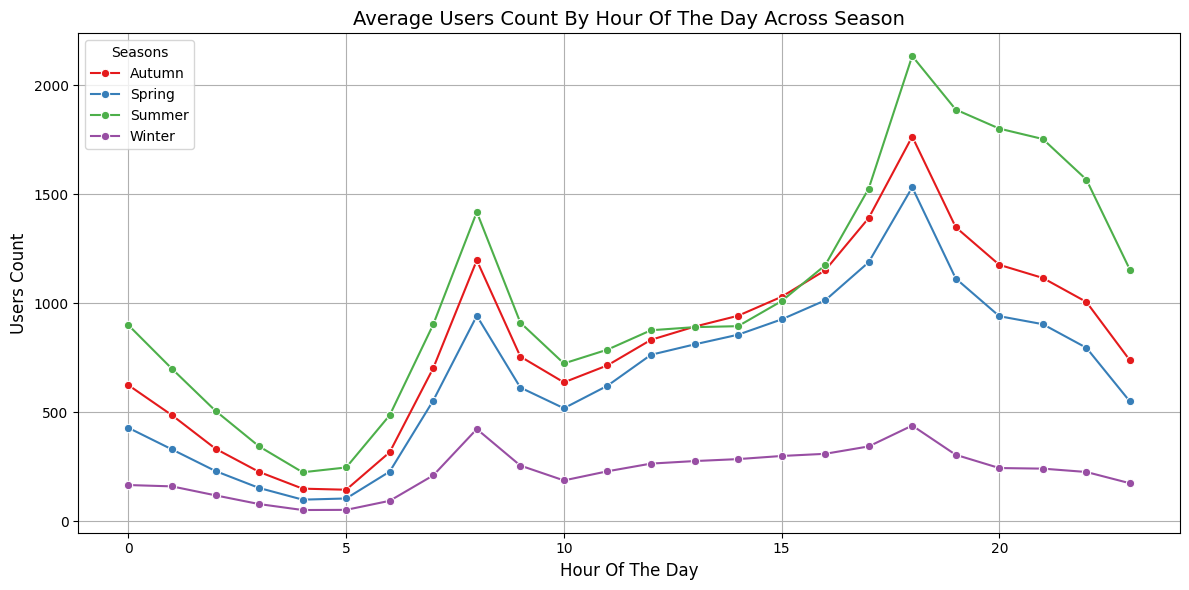

In [12]:


# Function to plot average users count by hour across seasons
def plot_average_users_by_hour_season(df, target, hour_col='Hour', season_col='Seasons'):
    """
    Plot average user count by hour of the day across seasons.
    Parameters:
    - df: DataFrame containing the data.
    - target: Name of the target variable column (e.g., Rented Bike Count).
    - hour_col: Name of the hour column.
    - season_col: Name of the season column.
    """
    
    # Aggregate the data
    aggregated_data = df.groupby([hour_col, season_col])[target].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=aggregated_data,
        x=hour_col,
        y=target,
        hue=season_col,
        marker='o',
        palette='Set1'
    )

    # Customize the plot
    plt.title('Average Users Count By Hour Of The Day Across Season', fontsize=14)
    plt.xlabel('Hour Of The Day', fontsize=12)
    plt.ylabel('Users Count', fontsize=12)
    plt.legend(title='Seasons', fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_users_by_hour_season(Data, target='Rented Bike Count', hour_col='Hour', season_col='Seasons')


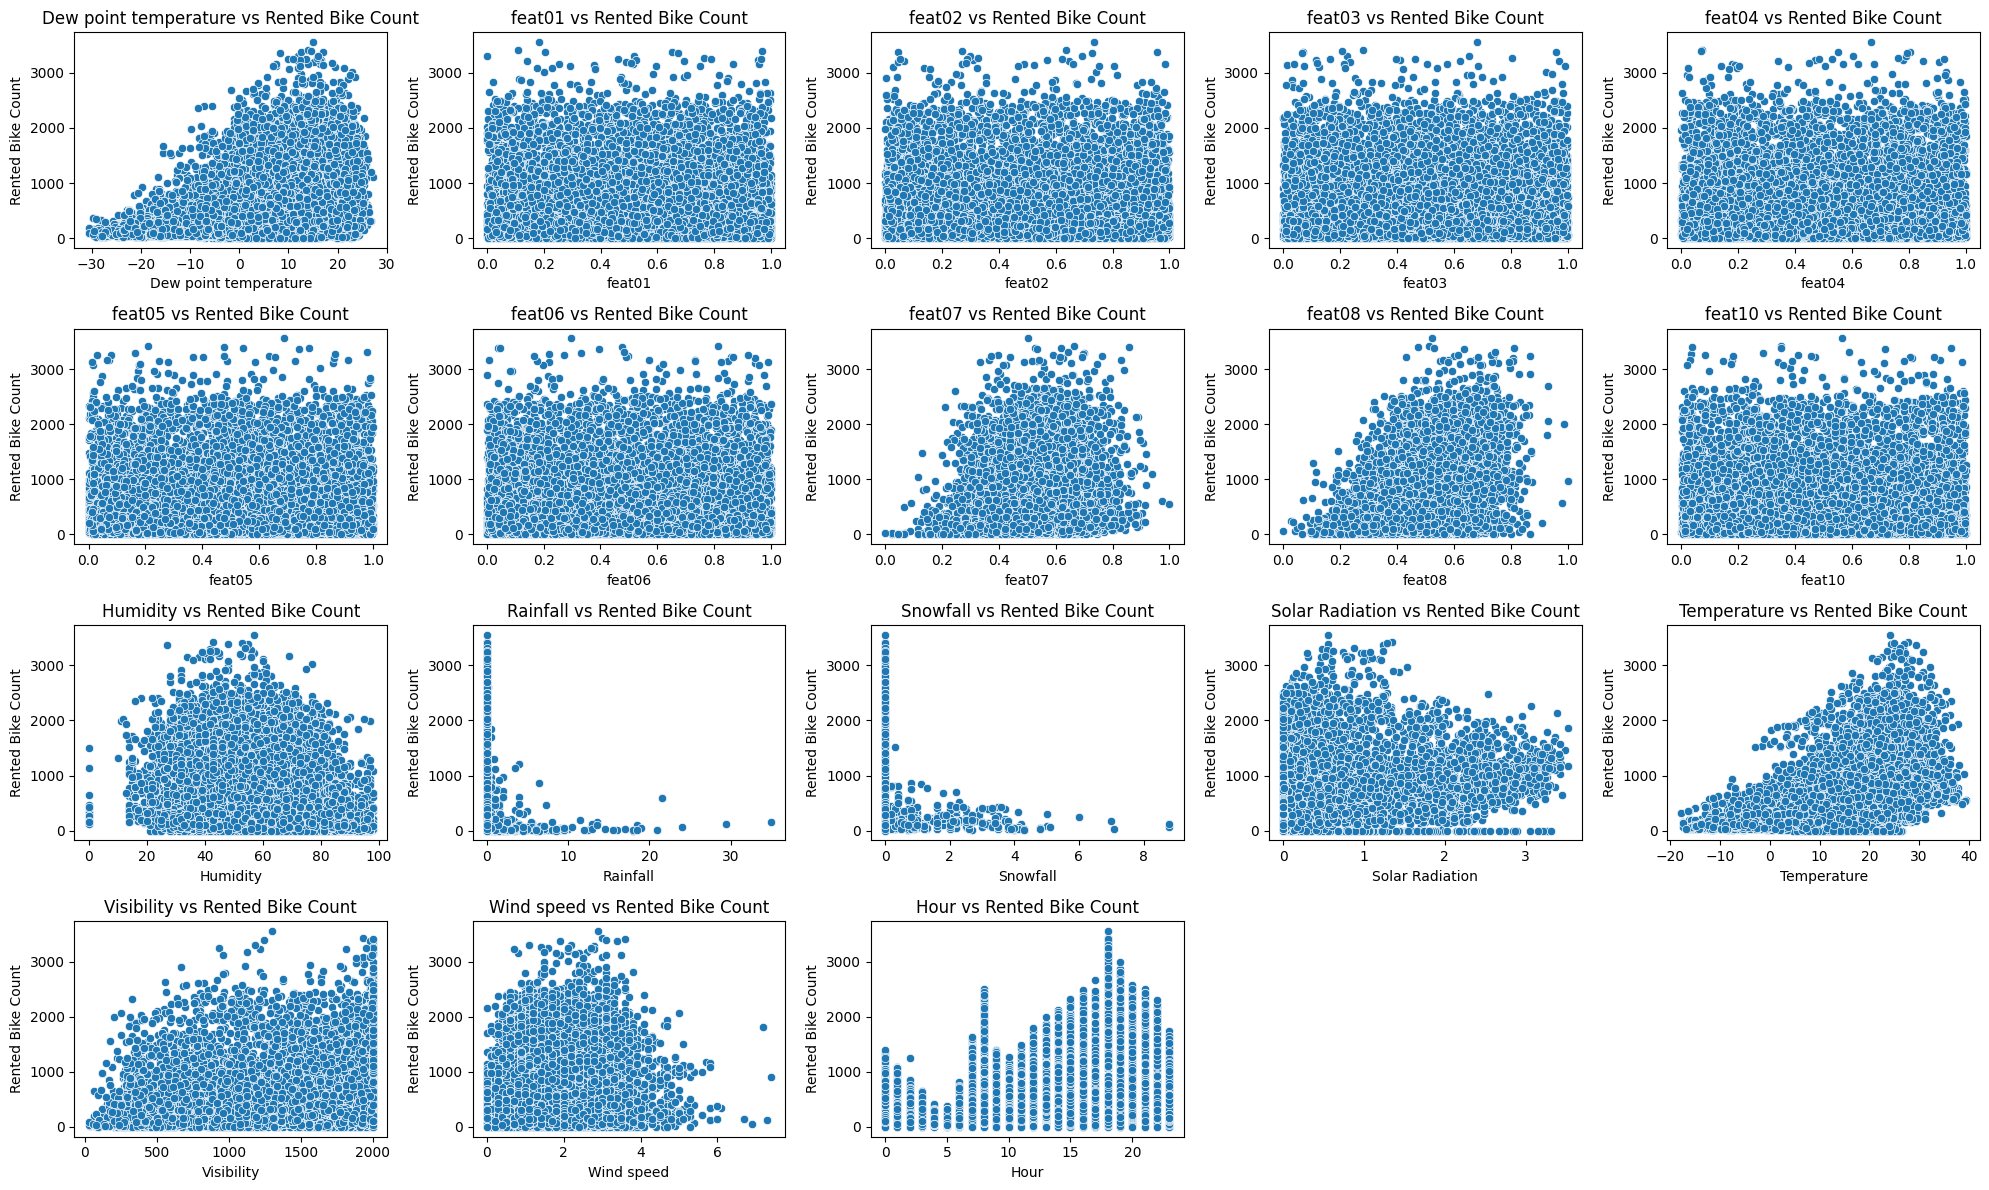

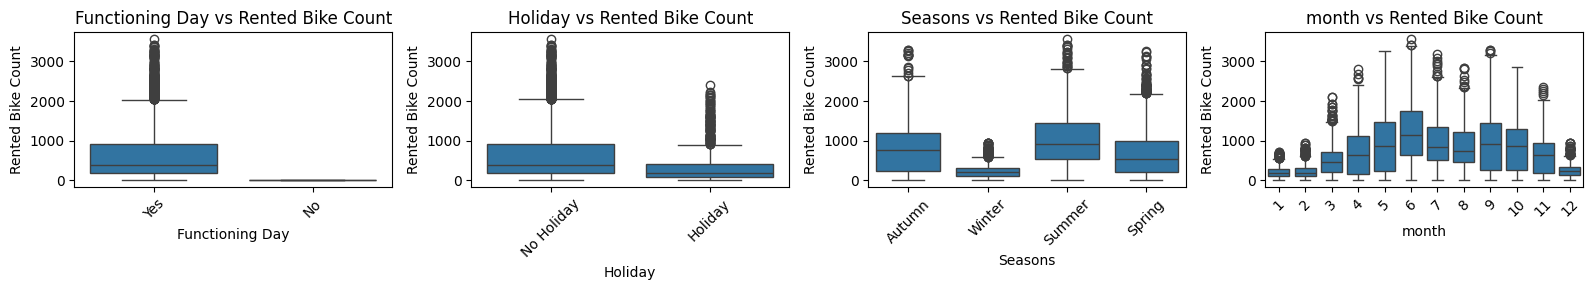

In [13]:

# Function to plot relationships in a grid layout
def plot_relationships_grid(df, target_variable):
    # Define features
    numerical_features = [
        "Dew point temperature", "feat01", "feat02", "feat03", "feat04",
        "feat05", "feat06", "feat07", "feat08", "feat10", "Humidity",
        "Rainfall", "Snowfall", "Solar Radiation", "Temperature",
        "Visibility", "Wind speed", "Hour"
    ]
    categorical_features = ["Functioning Day", "Holiday", "Seasons", 'month']

    # Set up grid for numerical features
    n_num = len(numerical_features)
    n_rows_num = (n_num + 4) // 5  # 4 rows, 5 columns
    fig_num, axes_num = plt.subplots(n_rows_num, 5, figsize=(20, n_rows_num * 3))
    axes_num = axes_num.flatten()

    for i, feature in enumerate(numerical_features):
        if feature in df.columns:  # Check if feature exists
            sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes_num[i])
            axes_num[i].set_title(f'{feature} vs {target_variable}')
            axes_num[i].set_xlabel(feature)
            axes_num[i].set_ylabel(target_variable)

    # Hide unused axes
    for j in range(i + 1, len(axes_num)):
        fig_num.delaxes(axes_num[j])

    plt.tight_layout()
    plt.show()

    # Set up grid for categorical features
    n_cat = len(categorical_features)
    n_rows_cat = (n_cat + 4) // 5  # Adjust rows for fewer categorical features
    fig_cat, axes_cat = plt.subplots(n_rows_cat, 5, figsize=(20, n_rows_cat * 3))
    axes_cat = axes_cat.flatten()

    for i, feature in enumerate(categorical_features):
        if feature in df.columns:  # Check if feature exists
            sns.boxplot(x=feature, y=target_variable, data=df, ax=axes_cat[i])
            axes_cat[i].set_title(f'{feature} vs {target_variable}')
            axes_cat[i].set_xlabel(feature)
            axes_cat[i].set_ylabel(target_variable)
            axes_cat[i].tick_params(axis='x', rotation=45)

    # Hide unused axes
    for j in range(i + 1, len(axes_cat)):
        fig_cat.delaxes(axes_cat[j])

    plt.tight_layout()
    plt.show()

# Call the function
#plot_relationships_grid(X_train.assign(target=y_train), "target")
plot_relationships_grid(Data, 'Rented Bike Count')


Step 2: Preprocessing

In [25]:
Data = Data.drop(columns=['id'])

In [26]:
Data = Data.drop(columns=['Date'])

Manually transforming categorical data from string values to numeric representations.

In [27]:
Data.value_counts('Seasons')

Seasons
Winter    4320
Spring    2968
Summer    2208
Autumn    2184
Name: count, dtype: int64

In [28]:
# Define the mapping of numbers to seasons
season_mapping = {'Spring': 1, 'Summer':2,  'Autumn':3,'Winter':4}

# Apply the mapping using map
Data['Seasons'] = Data['Seasons'].map(season_mapping)


In [29]:
Data.value_counts('Seasons')

Seasons
4    4320
1    2968
2    2208
3    2184
Name: count, dtype: int64

In [30]:
Data.value_counts('Holiday')

Holiday
No Holiday    11032
Holiday         648
Name: count, dtype: int64

In [31]:
holiday_mapping={'No Holiday':0, 'Holiday':1}
Data['Holiday'] = Data['Holiday'].map(holiday_mapping)

In [32]:
Data.value_counts('Holiday')

Holiday
0    11032
1      648
Name: count, dtype: int64

In [33]:
Data.value_counts('Functioning Day')

Functioning Day
Yes    11385
No       295
Name: count, dtype: int64

In [34]:
func_mapping={'No':0, 'Yes':1}
Data['Functioning Day'] = Data['Functioning Day'].map(func_mapping)

In [35]:
Data.value_counts('Functioning Day')

Functioning Day
1    11385
0      295
Name: count, dtype: int64

In this step, MinMax scaling is applied to the numeric columns of the dataset, excluding specific columns such as 'Hour', 'Functioning Day', 'month', 'Holiday', 'Seasons', and 'Rented Bike Count'. MinMax scaling normalizes the data by transforming each feature into a range between 0 and 1. This ensures that all features contribute equally to machine learning models, particularly those sensitive to the scale of data.

In [36]:


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (excluding 'Rented Bike Count' and 'Hour')
columns_to_scale = Data.select_dtypes(include=['float64', 'int64']).columns.difference(['Hour', 'Functioning Day',  'month', 'Holiday', 'Seasons', 'Rented Bike Count'])

# Apply MinMax scaling to the selected columns
Data[columns_to_scale] = scaler.fit_transform(Data[columns_to_scale])


In [37]:
Data.head()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,...,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,month
0,0.681661,0.585366,0.026089,0.920352,0.315089,0.977490,0.169418,0.656922,0.424366,0.094350,...,0.908163,0.0,148,3,0.0,0.005682,0.496503,0.335530,0.202703,11
1,0.683391,0.730925,0.066389,0.349491,0.456714,0.822886,0.471329,0.424646,0.382840,0.265212,...,0.632653,0.0,335,3,0.0,0.002841,0.596154,1.000000,0.270270,9
2,0.209343,0.826909,0.325048,0.772162,0.918193,0.994515,0.239237,0.535647,0.559941,0.521049,...,0.397959,0.0,186,4,0.0,0.000000,0.190559,1.000000,0.216216,1
3,0.958478,0.115726,0.793066,0.259343,0.797654,0.108765,0.657347,0.522908,0.681320,0.857901,...,0.755102,0.0,1868,2,0.0,0.000000,0.835664,0.521541,0.364865,7
4,0.686851,0.319252,0.842451,0.001913,0.976225,0.898687,0.035898,0.525282,0.674364,0.198284,...,0.316327,0.0,1441,1,0.0,0.934659,0.797203,0.658388,0.270270,5


### Feature selection

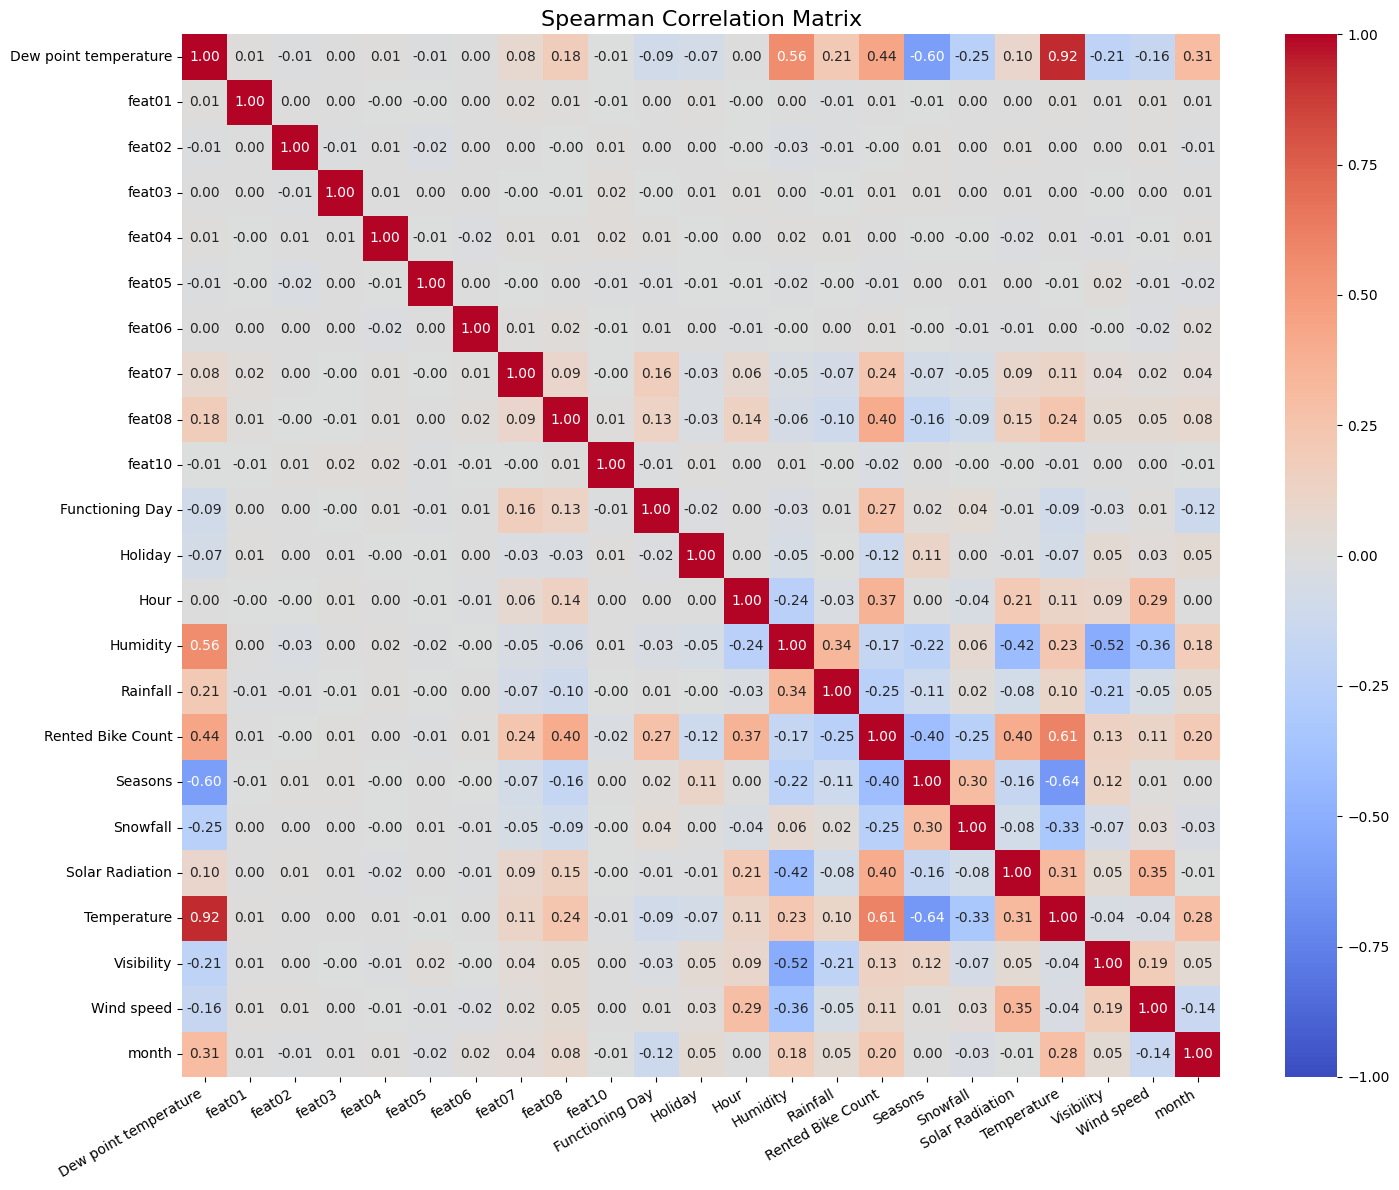

In [38]:


# Function to plot the correlation heatmap
def plot_correlation_matrix(df, method='pearson'):
    """
    Plot a heatmap of the correlation matrix with numbers.
    Parameters:
    - df: DataFrame containing the dataset.
    - method: Correlation method ('pearson', 'spearman', 'kendall').
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Compute correlation matrix
    corr_matrix = numeric_df.corr(method=method)

    # Create the heatmap
    plt.figure(figsize=(15, 12))  # Adjust figure size for better visualization
    sns.heatmap(
        corr_matrix,
        annot=True,  # Display correlation values
        fmt=".2f",   # Format for the numbers
        cmap="coolwarm",  # Color palette
        cbar=True,    # Show color bar
        vmin=-1, vmax=1  # Range of correlation values
    )
    plt.title(f'{method.capitalize()} Correlation Matrix', fontsize=16)
    
    # Adjust x-ticks and y-ticks
    plt.xticks(fontsize=10, rotation=30, ha='right')  # Rotate x-ticks with alignment
    plt.yticks(fontsize=10, rotation=0)  # Keep y-ticks horizontal

    plt.tight_layout()
    plt.show()

# Example call with a DataFrame `Data`:
plot_correlation_matrix(Data, method='spearman')


The heatmap above visualizes the correlation between "Rented Bike Count" and the selected features. Here are the most significant correlations:

Positive Correlations: Temperature: Strong positive correlation (0.61). Dew point temperature: Moderate positive correlation (0.44). Solar Radiation: Moderate positive correlation (0.40). Hour: Moderate positive correlation (0.37). feat08: Moderate positive correlation (0.40). Negative Correlations: Snowfall: Moderate negative correlation (-0.25). Rainfall: Moderate negative correlation (-0.25). Humidity: Weak negative correlation (-0.17). Insights: Weather-related features like temperature and solar radiation have a strong impact on bike rentals. Adverse weather conditions (snowfall, rainfall, and humidity) negatively affect bike rentals. The time of day (hour) also plays a significant role, indicating higher rentals during certain periods.

**Apply Boruta**

The **Boruta algorithm** is a feature selection method designed to identify all relevant variables for a predictive model. It is built on the Random Forest algorithm and operates as a wrapper method, comparing the importance of real features with that of "shadow features," which are randomly shuffled copies of the original variables. This ensures a robust evaluation of feature relevance. Boruta iteratively evaluates the importance of each feature and assigns one of three outcomes: confirmed (important), tentative (possibly important), or rejected (not important). By filtering out irrelevant variables, the algorithm reduces model complexity, enhances interpretability, and can improve prediction performance. It is particularly useful in high-dimensional datasets and is often used before splitting data into training and testing sets to ensure consistent feature selection.

In [39]:


# Define features (X) and target (y)
X = Data.drop(columns=['Rented Bike Count'])
y = Data['Rented Bike Count']

# Initialize Random Forest
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# Initialize Boruta
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

# Fit Boruta
boruta.fit(X.values, y.values)

# Get the selected features
selected_features = X.columns[boruta.support_]
print("Selected Features by Boruta:")
print(selected_features)


Selected Features by Boruta:
Index(['Dew point temperature', 'feat07', 'feat08', 'Functioning Day', 'Hour',
       'Humidity', 'Rainfall', 'Seasons', 'Solar Radiation', 'Temperature',
       'Visibility', 'Wind speed', 'month'],
      dtype='object')


Step 4: Split the Data

In [40]:



# Define features (X) and target variable (y)
X=Data[['Dew point temperature', 'feat07', 'feat08', 'Functioning Day', 'Hour',
       'Humidity', 'Rainfall', 'Seasons', 'Solar Radiation', 'Temperature',
       'Visibility', 'Wind speed', 'month']]
#X = Data.drop(columns=['Rented Bike Count'])  # Drop the target column
y = Data['Rented Bike Count']  # Target column
# Replace spaces with underscores in column names
X.columns = X.columns.str.replace(' ', '_')

# Split the data: 75% for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display dimensions of the training and testing sets
print(f"Training set dimensions (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set dimensions (X_test, y_test): {X_test.shape}, {y_test.shape}")


Training set dimensions (X_train, y_train): (8760, 13), (8760,)
Testing set dimensions (X_test, y_test): (2920, 13), (2920,)


## **Model Building and Evaluation**

### **Evaluation Metrics**
In regression analysis, evaluating the performance of a model is crucial to understanding how well it predicts the target variable. I have chosen the following metrics to assess the accuracy and reliability of the regression model:

#### **1. Root Mean Squared Error (RMSE)**
- RMSE measures the square root of the average squared differences between the predicted and actual values.
- It provides an indication of how much error the model typically makes in its predictions, with larger errors penalized more heavily than smaller ones.
- **Why chosen?** RMSE is widely used for its interpretability and sensitivity to large errors, making it ideal for applications where significant deviations are critical.

#### **2. Mean Absolute Error (MAE)**
- MAE calculates the average of the absolute differences between predicted and actual values.
- Unlike RMSE, it treats all errors equally, without giving extra weight to larger deviations.
- **Why chosen?** MAE offers a straightforward measure of the average prediction error, making it easy to understand and interpret.

#### **3. Mean Absolute Percentage Error (MAPE)**
- MAPE represents the error as a percentage of the actual values, providing a relative measure of prediction accuracy.
- It is especially useful when dealing with data where understanding the scale of errors relative to the target variable is important.
- **Why chosen?** MAPE enables comparison of model performance across datasets with different scales, making it a versatile metric.

#### **4. R-squared (R²)**
- R² measures the proportion of the variance in the target variable that is explained by the model.
- It ranges from 0 to 1, where a higher value indicates better predictive performance.
- **Why chosen?** R² provides a high-level overview of model effectiveness, summarizing its ability to explain the variability in the data.


# **Modeling**
***Decision Trees***
A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It works by recursively splitting the data into subsets based on feature values, creating a tree-like structure where each internal node represents a decision on a feature, and each leaf node represents an output value (class label or regression prediction).
**How does a Decision Tree work?**
1. Splitting: At each node, the algorithm selects the best feature and threshold to split the data into two subsets. This is done to maximize the homogeneity of the target variable in the subsets.
2. Impurity Measures

**Stopping Criteria for Decision Trees:**
The tree stops growing when:
1. A maximum depth is reached.
2. The number of samples in a node is below a threshold.
3. The improvement in impurity reduction is below a threshold.

**Prediction:**
- **For Classification**: The majority class in the leaf node is the predicted class.
- **For Regression**: The mean value of the target variable in the leaf node is the predicted value.

**Decision Tree Algorithm in Python:**
We’ll use the `DecisionTreeClassifier` and `DecisionTreeRegressor` classes from the `scikit-learn` library. These implementations handle most of the complexity for us.


In [165]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Evaluate a regression model on training and testing datasets.
    
    Parameters:
        model: Trained regression model.
        X_train: Training features.
        y_train: Training target values.
        X_test: Testing features.
        y_test: Testing target values.
        model_name: Name of the model (default: "Model").
        
    Returns:
        A dictionary containing evaluation metrics for both train and test datasets.
    """
    # Predict on training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    
    # Calculate metrics for testing data
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Print results
    print(f"--- {model_name} ---")
    print(f"Training Metrics:")
    print(f"  MSE: {train_mse:.2f}")
    print(f"  RMSE: {train_rmse:.2f}")
    print(f"  R²: {train_r2:.2f}")
    print(f"  MAE: {train_mae:.2f}")
    print(f"Testing Metrics:")
    print(f"  MSE: {test_mse:.2f}")
    print(f"  RMSE: {test_rmse:.2f}")
    print(f"  R²: {test_r2:.2f}")
    print(f"  MAE: {test_mae:.2f}")
    
    # Return results as a dictionary
    return {
        "model_name": model_name,
        "train_mse": train_mse,
        "train_rmse": train_rmse,
        "train_r2": train_r2,
        "train_mae": train_mae,
        "test_mse": test_mse,
        "test_rmse": test_rmse,
        "test_r2": test_r2,
        "test_mae": test_mae
    }



### Decision tree regresion

In [166]:
# train decision tree regresion
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=123)
tree_reg.fit(X_train, y_train)

# Evaluate the model
dt_results = evaluate_model(tree_reg, X_train, y_train, X_test, y_test, model_name="Decision Tree Regression")

--- Decision Tree Regression ---
Training Metrics:
  MSE: 97567.19
  RMSE: 312.36
  R²: 0.73
  MAE: 203.85
Testing Metrics:
  MSE: 97547.80
  RMSE: 312.33
  R²: 0.72
  MAE: 204.56


### Tuned Decision Tree Regressor

In [167]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best MSE:", -grid_search.best_score_)

# Evaluate the model
dt_results = evaluate_model(best_model, X_train, y_train, X_test, y_test, model_name=" Tuned Decision Tree Regression")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE: 78002.95219517386
---  Tuned Decision Tree Regression ---
Training Metrics:
  MSE: 70052.62
  RMSE: 264.67
  R²: 0.81
  MAE: 163.62
Testing Metrics:
  MSE: 75246.28
  RMSE: 274.31
  R²: 0.78
  MAE: 170.48


#### visualization

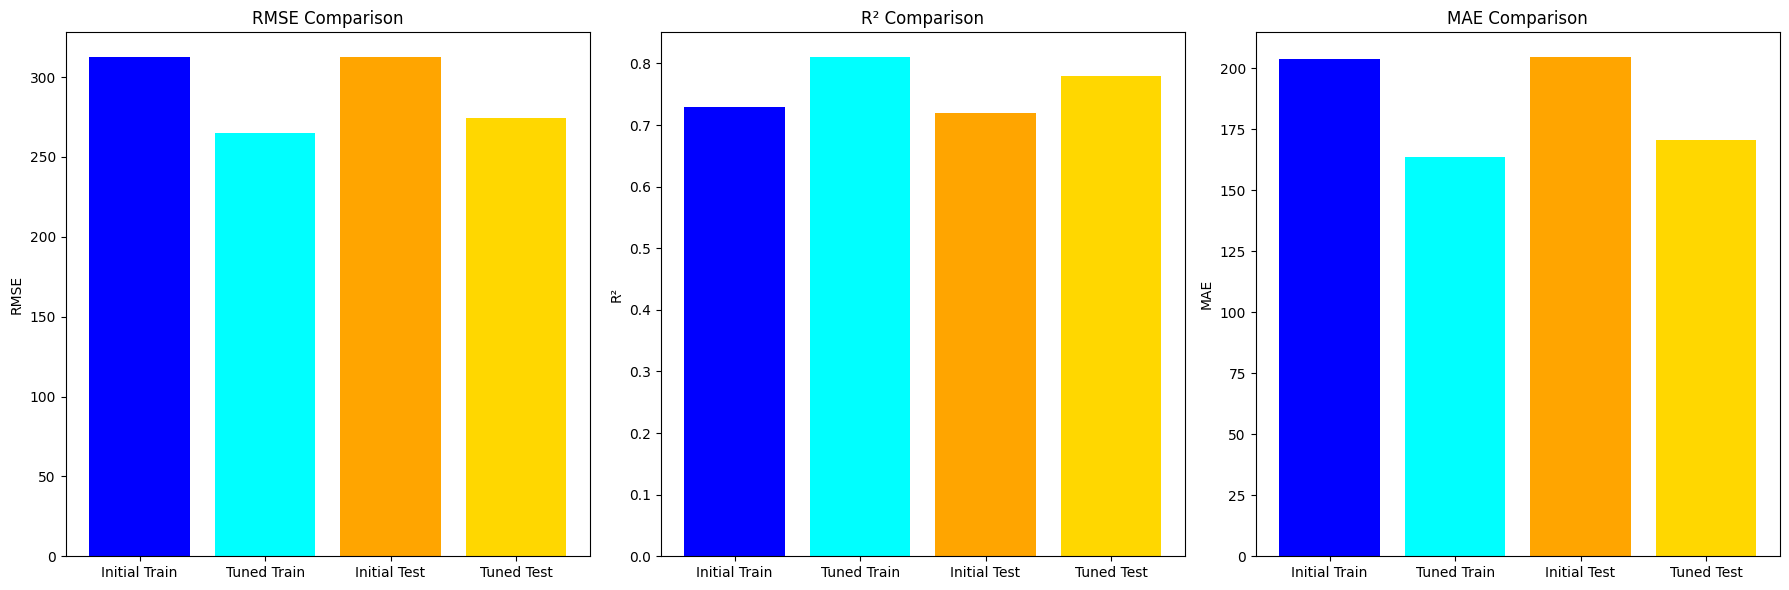

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
metrics = ['RMSE', 'R²', 'MAE']
initial_train = [312.36, 0.73, 203.85]
initial_test = [312.33, 0.72, 204.56]
tuned_train = [264.67, 0.81, 163.62]
tuned_test = [274.31, 0.78, 170.48]

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: RMSE comparison
axs[0].bar(['Initial Train', 'Tuned Train', 'Initial Test',  'Tuned Test'], 
           [initial_train[0], tuned_train[0], initial_test[0],  tuned_test[0]], 
           color=['blue', 'cyan', 'orange', 'gold'])
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE')

# Plot 2: R² comparison
axs[1].bar(['Initial Train', 'Tuned Train', 'Initial Test', 'Tuned Test'], 
           [initial_train[1], tuned_train[1], initial_test[1], tuned_test[1]], 
           color=['blue', 'cyan', 'orange', 'gold'])
axs[1].set_title('R² Comparison')
axs[1].set_ylabel('R²')

# Plot 3: MAE comparison
axs[2].bar(['Initial Train', 'Tuned Train', 'Initial Test', 'Tuned Test'], 
           [initial_train[2], tuned_train[2], initial_test[2],  tuned_test[2]], 
           color=['blue', 'cyan', 'orange', 'gold'])
axs[2].set_title('MAE Comparison')
axs[2].set_ylabel('MAE')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


### Bagging Regressor

In [169]:
# Initialize the Bagging Regressor
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Evaluate the model
dt_results = evaluate_model(bagging_model, X_train, y_train, X_test, y_test, model_name=" Bagging Regressor")

---  Bagging Regressor ---
Training Metrics:
  MSE: 5443.22
  RMSE: 73.78
  R²: 0.99
  MAE: 41.74
Testing Metrics:
  MSE: 35727.46
  RMSE: 189.02
  R²: 0.90
  MAE: 109.54


### Tuned Bagging Regressor with GridSearchCV

In [170]:
# Define the model
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],             # Number of base models
    'max_samples': [0.5, 0.7],            # Fraction of the dataset used for each base model
    'max_features': [0.5, 0.7, 1.0],           # Fraction of features used for each base model
    'estimator__max_depth': [3, 5, 7],      # Maximum depth of decision trees
    'estimator__min_samples_split': [2, 5, 10] # Min samples to split a node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=bagging_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Use MSE as the scoring metric
    cv=5,                             # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Display the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)

print("Best Score (MSE):", -grid_search.best_score_)

# Evaluate the model
dt_results = evaluate_model(best_model, X_train, y_train, X_test, y_test, model_name="Tuned Bagging Regressor")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'estimator__max_depth': 7, 'estimator__min_samples_split': 5, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 150}
Best Score (MSE): 58969.91591976654
--- Tuned Bagging Regressor ---
Training Metrics:
  MSE: 52664.64
  RMSE: 229.49
  R²: 0.86
  MAE: 144.85
Testing Metrics:
  MSE: 55133.80
  RMSE: 234.81
  R²: 0.84
  MAE: 149.81


### Tuned Bagging Regressor with RandomizedSearchCV

In [171]:
from sklearn.model_selection import RandomizedSearchCV

# Create the Bagging Regressor model
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42))

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100],  # Further reduce the number of base models
    'max_samples': [0.5, 0.6],   # Reduce fraction of data for each base model
    'max_features': [0.5, 0.7],  # Reduce fraction of features used
    'estimator__max_depth': [5, 7],  # Shallower trees
    'estimator__min_samples_split': [10],  # Increase min samples to split
    'estimator__min_samples_leaf': [4, 5]  # Increase min samples for leaf nodes
}
# RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

# Display the best parameters and the corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score (MSE):", -random_search.best_score_)

# Evaluate the model
dt_results = evaluate_model(best_model, X_train, y_train, X_test, y_test, model_name="Tuned Bagging Regressor")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'max_samples': 0.7, 'max_features': 1.0, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 10}
Best Score (MSE): 44533.57472806117
--- Tuned Bagging Regressor ---
Training Metrics:
  MSE: 28251.26
  RMSE: 168.08
  R²: 0.92
  MAE: 103.65
Testing Metrics:
  MSE: 40915.33
  RMSE: 202.28
  R²: 0.88
  MAE: 125.62


### Gradient Boosting Regressor

In [172]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model
dt_results = evaluate_model(gb_model, X_train, y_train, X_test, y_test, model_name="Gradient Boosting Regressor")

--- Gradient Boosting Regressor ---
Training Metrics:
  MSE: 47064.34
  RMSE: 216.94
  R²: 0.87
  MAE: 142.05
Testing Metrics:
  MSE: 51937.34
  RMSE: 227.90
  R²: 0.85
  MAE: 150.62


### Tunned Gradient Boosting Regressor

In [173]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100],       # Number of boosting stages
    'learning_rate': [0.05, 0.01],    # Step size shrinkage
    'max_depth': [5, 7],               # Maximum depth of each tree
    'min_samples_split': [5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [ 3, 4],        # Minimum number of samples required to be at a leaf node
    'subsample': [0.6, 0.7],              # Fraction of samples used for fitting the individual base learners
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider for the best split
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Use MSE as the scoring metric
    cv=5,                             # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

# Evaluate the model
dt_results = evaluate_model(best_model, X_train, y_train, X_test, y_test, model_name=" Tuned Gradient Boosting Regressor")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packag

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.6}
Best Score (MSE): 44073.1115907731
---  Tuned Gradient Boosting Regressor ---
Training Metrics:
  MSE: 29402.35
  RMSE: 171.47
  R²: 0.92
  MAE: 108.89
Testing Metrics:
  MSE: 42942.73
  RMSE: 207.23
  R²: 0.88
  MAE: 131.81


## Neural Network Model

In [174]:
# Define the neural network
nn_model_1 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_1.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model_1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 421596.9062
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 190019.1719
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154376.9844
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 142039.1406
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128593.8984
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 127527.8906
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131208.4531
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121205.3672
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123914.8125
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 109549.6484
Epoch 11/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110830.7266
Epoch 12/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118107.7969
Epoch 13/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118229.1016
Epoch 14/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 116085.617

In [175]:
# Evaluate the model

dt_results = evaluate_model(nn_model_1, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=50\n batch_size=32\nlearning_rate=0.01 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
---  Neural Network Model ---
Training Metrics:
  MSE: 63609.68
  RMSE: 252.21
  R²: 0.83
  MAE: 171.24
Testing Metrics:
  MSE: 64190.74
  RMSE: 253.36
  R²: 0.82
  MAE: 172.22

epochs=50
 batch_size=32
learning_rate=0.01 


100 epock

In [176]:
# Define the neural network
nn_model_2 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_2.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model_2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 367655.8750
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178178.1094
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 154210.9844
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140352.9531
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133748.2812
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 123187.3984
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125956.7969
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117039.9531
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115269.0703
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111495.2500
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113122.9688
Epoch 12/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113661.8281
Epoch 13/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103792.5234
Epoch 14/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [177]:
# Evaluate the model

dt_results = evaluate_model(nn_model_2, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=100\n batch_size=32\nlearning_rate=0.01 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
---  Neural Network Model ---
Training Metrics:
  MSE: 52592.46
  RMSE: 229.33
  R²: 0.86
  MAE: 150.10
Testing Metrics:
  MSE: 51586.43
  RMSE: 227.13
  R²: 0.85
  MAE: 151.18

epochs=100
 batch_size=32
learning_rate=0.01 


150 epock

In [178]:
# Define the neural network
nn_model_3 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_3.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model_3.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)


Epoch 1/150


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 371168.8750
Epoch 2/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 181841.9062
Epoch 3/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 150579.2969
Epoch 4/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 140076.3906
Epoch 5/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137071.0000
Epoch 6/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119962.7500
Epoch 7/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122584.3438
Epoch 8/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122279.2422
Epoch 9/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 120093.3125
Epoch 10/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116007.9375
Epoch 11/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117747.5156
Epoch 12/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 116431.9844
Epoch 13/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117302.3281
Epoch 14/150
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [179]:
# Evaluate the model

dt_results = evaluate_model(nn_model_3, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=150\n batch_size=32\nlearning_rate=0.01 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
---  Neural Network Model ---
Training Metrics:
  MSE: 51137.91
  RMSE: 226.14
  R²: 0.86
  MAE: 152.07
Testing Metrics:
  MSE: 51598.68
  RMSE: 227.15
  R²: 0.85
  MAE: 152.44

epochs=150
 batch_size=32
learning_rate=0.01 


batch size 64

In [180]:
# Define the neural network
nn_model_4 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_4.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model_4.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 457412.5938
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 221021.8281
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178148.1719
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159560.3594
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153489.5000
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148700.5000
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145260.3594
Epoch 8/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136751.2812
Epoch 9/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135573.7969
Epoch 10/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128469.8906
Epoch 11/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126365.1875
Epoch 12/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123809.6875
Epoch 13/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122715.8594
Epoch 14/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [181]:
# Evaluate the model

dt_results = evaluate_model(nn_model_4, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=100\n batch_size=64\nlearning_rate=0.01 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
---  Neural Network Model ---
Training Metrics:
  MSE: 50864.12
  RMSE: 225.53
  R²: 0.86
  MAE: 148.14
Testing Metrics:
  MSE: 50264.37
  RMSE: 224.20
  R²: 0.86
  MAE: 148.96

epochs=100
 batch_size=64
learning_rate=0.01 


batch size 16

In [182]:
# Define the neural network
nn_model_5 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_5.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
nn_model_5.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)


Epoch 1/100


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 315509.0938
Epoch 2/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 165272.5938
Epoch 3/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 146654.8438
Epoch 4/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 120580.2812
Epoch 5/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 113523.2188
Epoch 6/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 105919.1016
Epoch 7/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 110287.1562
Epoch 8/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 101769.5469
Epoch 9/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 96917.3203
Epoch 10/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 100415.2031
Epoch 11/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 95796.8359
Epoch 12/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 97231.8359
Epoch 13/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 92063.4375
Epoch 14/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9

In [183]:
# Evaluate the model

dt_results = evaluate_model(nn_model_5, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=100\n batch_size=16\nlearning_rate=0.01 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
---  Neural Network Model ---
Training Metrics:
  MSE: 47469.28
  RMSE: 217.87
  R²: 0.87
  MAE: 142.20
Testing Metrics:
  MSE: 47766.46
  RMSE: 218.56
  R²: 0.86
  MAE: 144.28

epochs=100
 batch_size=16
learning_rate=0.01 


learning rate 0.1

In [184]:
# Define the neural network
nn_model_6 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_6.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

# Train the model
nn_model_6.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)


Epoch 1/100


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 236226.4844
Epoch 2/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 160359.4688
Epoch 3/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150390.7500
Epoch 4/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 138508.8281
Epoch 5/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 145619.5938
Epoch 6/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 145163.2031
Epoch 7/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 146697.8125
Epoch 8/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 135105.4531
Epoch 9/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 131992.8281
Epoch 10/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 140178.7969
Epoch 11/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 128727.9688
Epoch 12/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 129850.8281
Epoch 13/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 129162.6406
Epoch 14/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - los

In [185]:
# Evaluate the model

dt_results = evaluate_model(nn_model_6, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=100\n batch_size=16\nlearning_rate=0.1 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
---  Neural Network Model ---
Training Metrics:
  MSE: 81883.13
  RMSE: 286.15
  R²: 0.77
  MAE: 188.96
Testing Metrics:
  MSE: 83625.94
  RMSE: 289.18
  R²: 0.76
  MAE: 190.88

epochs=100
 batch_size=16
learning_rate=0.1 


learning rate 0.001

In [186]:
# Define the neural network
nn_model_7 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),                             # Second hidden layer
    Dense(1)                                                  # Output layer
])

# Compile the model
nn_model_7.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
nn_model_7.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)


Epoch 1/100


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 548387.1250
Epoch 2/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 266484.5625
Epoch 3/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 224332.8906
Epoch 4/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 199563.6562
Epoch 5/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 187702.8594
Epoch 6/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 178839.2656
Epoch 7/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 172460.6250
Epoch 8/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 161020.6250
Epoch 9/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 155419.9062
Epoch 10/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 158200.4844
Epoch 11/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 148139.3125
Epoch 12/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 137852.4219
Epoch 13/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 138482.6250
Epoch 14/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - los

In [187]:
# Evaluate the model

dt_results = evaluate_model(nn_model_7, X_train, y_train, X_test, y_test, model_name=" Neural Network Model")
print("\nepochs=100\n batch_size=16\nlearning_rate=0.001 ")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
---  Neural Network Model ---
Training Metrics:
  MSE: 86464.83
  RMSE: 294.05
  R²: 0.76
  MAE: 189.07
Testing Metrics:
  MSE: 87678.66
  RMSE: 296.11
  R²: 0.75
  MAE: 191.68

epochs=100
 batch_size=16
learning_rate=0.001 


#### **Best Hyperparameters for the Neural Network Model (NNL)**
**Learning Rate: 0.01**

**Epochs: 150**

**Batch Size: 32**